In [2]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 83.8MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('sales_prediction.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [8]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
X_train_copy = X_train.copy()
#

In [10]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
y_train.head(3)

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780


FEATURE ENGINEERING + EDA + DATA WRANGLING

In [12]:
  X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [13]:
X_train_copy.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [14]:
num_data = X_train_copy.select_dtypes(exclude = ['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [15]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [16]:
def vizualize_numeric_features(data_frame, col_name):
  fig, ax = plt.subplots(1, 2, figsize = (10,5))
  sns.histplot(data = data_frame, x = col_name, ax = ax[0])#this means that the histogram be put at the first column ie 0
  sns.boxplot(data = data_frame, x = col_name, ax = ax[1])#place_box plot at second column
  plt.show()

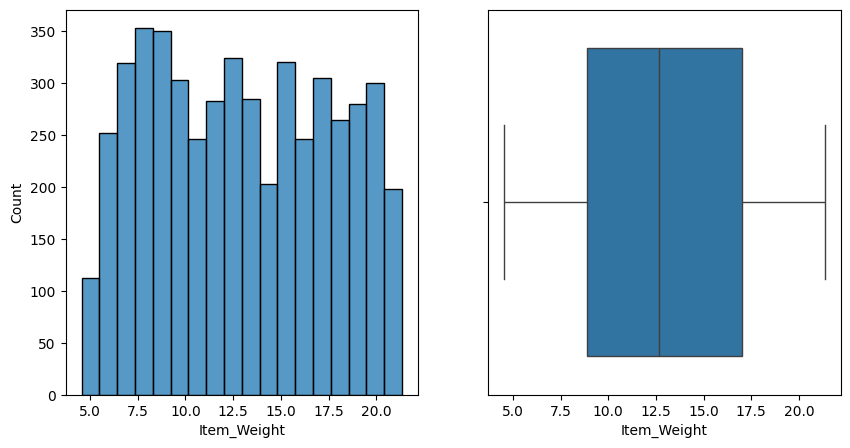

In [17]:
vizualize_numeric_features(X_train_copy,'Item_Weight')

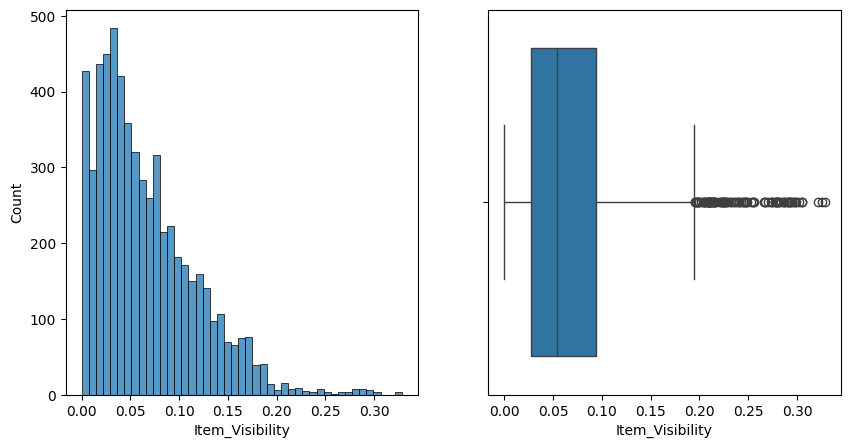

In [18]:
vizualize_numeric_features(X_train_copy,'Item_Visibility')

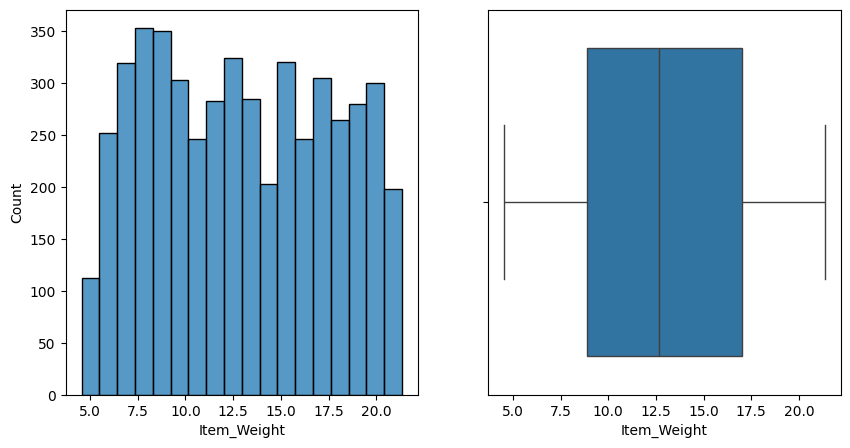

In [19]:
vizualize_numeric_features(X_train_copy,'Item_Weight')

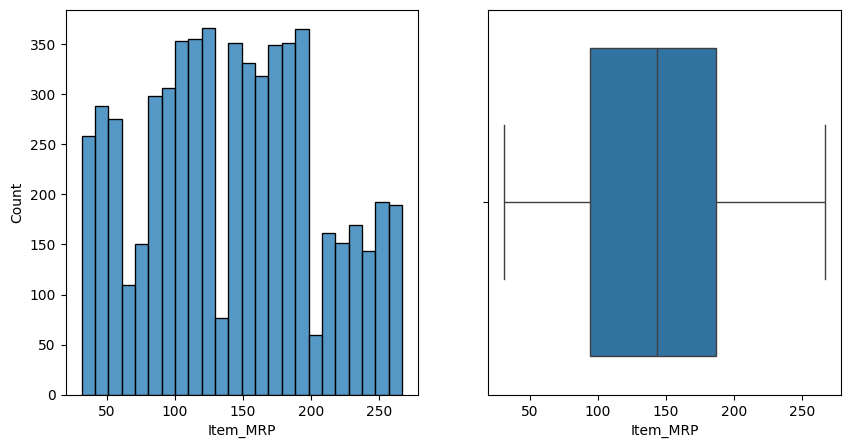

In [20]:
vizualize_numeric_features(X_train_copy,'Item_MRP')

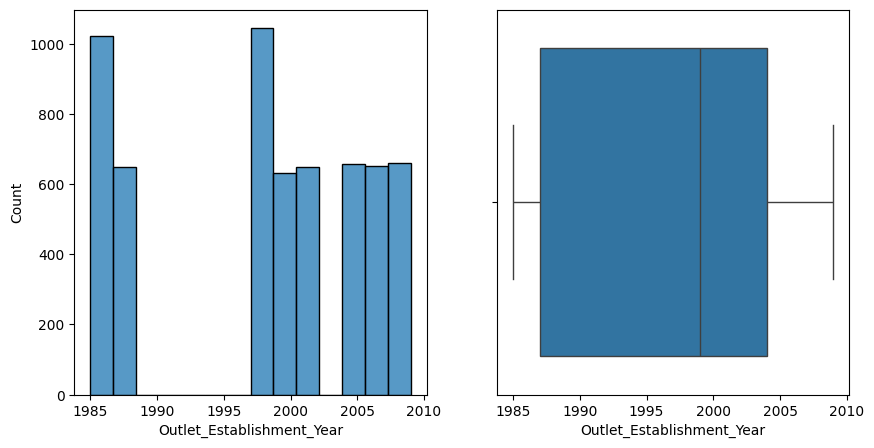

In [21]:
vizualize_numeric_features(X_train_copy,'Outlet_Establishment_Year')

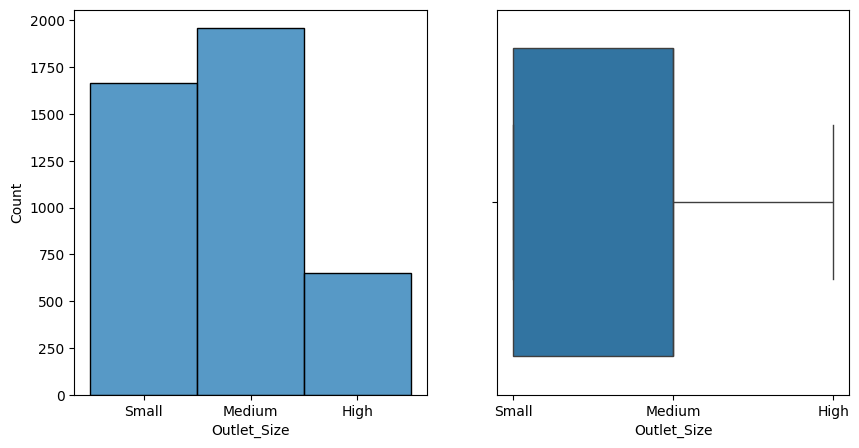

In [22]:
vizualize_numeric_features(X_train_copy,'Outlet_Size')

In [23]:
def Count_plot(data_frame, col_name):
  sns.countplot(data = data_frame, x = col_name)



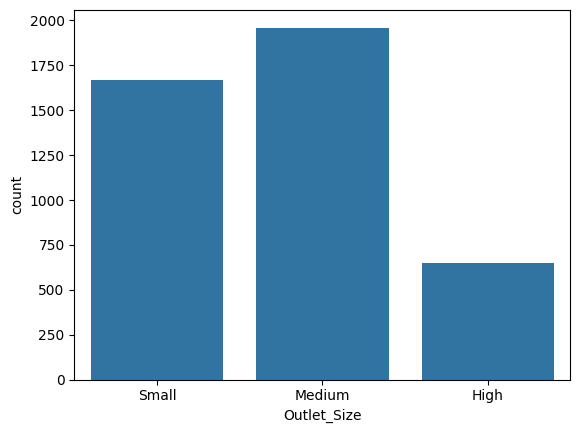

In [24]:
Count_plot(X_train_copy, 'Outlet_Size')


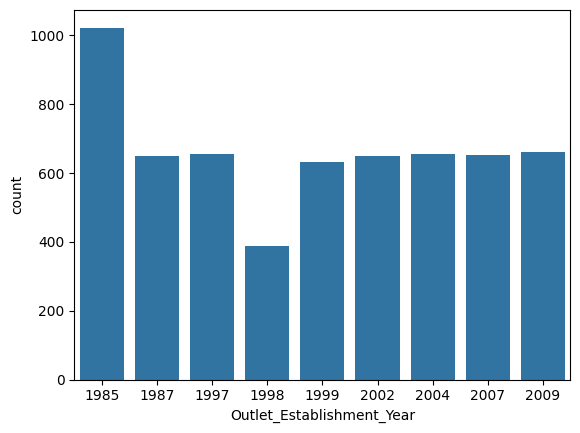

In [25]:
Count_plot(X_train_copy, 'Outlet_Establishment_Year')

In [26]:
cat_features = X_train_copy.select_dtypes(include = ['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [27]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [28]:
cat_features.nunique()

,0
Item_Identifier,1543
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [29]:
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [30]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
NCI54,9
FDF52,9
FDV60,8
FDT07,8
NCB18,8
...,...
FDT47,1
NCW42,1
DRH59,1


In [31]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [32]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


DATA WRANGLING + FEATURE ENGINEERING

CREATING HIGH LEVEL ITEM TYPES

In [33]:
X_train_copy['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [34]:
def create_item_types(data_frame, Col_name):
  data_frame['Item_Type'] = data_frame['Item_Identifier'].apply(lambda x: x[0:2])
  data_frame['Item_Type'] = data_frame['Item_Type'].map({
      'FD':'Food',
      'NC':'Non-Consumable',
      'DR':'Drinks'
      })
  return data_frame

In [35]:
create_item_types(X_train_copy, 'Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non-Consumable,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [36]:
from scipy.stats import mode

In [37]:
X_train_copy[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by = ['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [38]:
 ITEM_WEIGHT_PIVOT = X_train_copy.pivot_table(values = 'Item_Weight', index = 'Item_Identifier').reset_index()
 ITEM_WEIGHT_MAPPING = dict(zip(ITEM_WEIGHT_PIVOT['Item_Identifier'], ITEM_WEIGHT_PIVOT['Item_Weight']))
 list(ITEM_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [39]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_copy.pivot_table(values = 'Item_Weight', index = 'Item_Type',aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_TYPE_WEIGHT_MAPPING.items())

[('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)]

In [40]:
def impute_item_weight(data_frame):
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier']).replace(ITEM_WEIGHT_MAPPING)
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type']).replace(ITEM_TYPE_WEIGHT_MAPPING)
  return data_frame

In [41]:
impute_item_weight(X_train_copy)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.6,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.6,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.6,Low Fat,0.018944,Non-Consumable,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.35,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [42]:
X_train_copy.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [43]:
X_train_copy.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  Small          1312
                   High            649
                   Medium          631
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
Name: count, dtype: int64

In [44]:
OUTLET_TYPE_SIZE_PIVOT = X_train_copy.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type', aggfunc = (lambda x : x.mode().mode()[0])).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
list(OUTLET_TYPE_SIZE_MAPPING.items())

[('Grocery Store', 'Small'),
 ('Supermarket Type1', 'Small'),
 ('Supermarket Type2', 'Medium'),
 ('Supermarket Type3', 'Medium')]

In [45]:
def impute_outletsize(data_frame):
  data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type']).replace(ITEM_WEIGHT_MAPPING)
  return data_frame

In [46]:
X_train_copy = impute_outletsize(X_train_copy)

In [47]:
X_train_copy.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [48]:
X_train_copy['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [49]:
def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
      'LF':'Low Fat',
      'low fat':'Low Fat',
      'reg':'Regular'
  })
  return data_frame

In [50]:
X_train_copy = standardize_item_fat_content(X_train_copy)
X_train_copy['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3860
Regular,2106


In [51]:
X_train_copy.groupby(by = ['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Low Fat             1137
dtype: int64

In [52]:
def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
  return data_frame

In [53]:
X_train_copy.groupby(by = ['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Low Fat             1137
dtype: int64

In [54]:
def prepare_data(data_frame):
  data_frame = create_item_types(data_frame, 'Item_Identifier')
  data_frame = impute_item_weight(data_frame)
  data_frame = impute_outletsize(data_frame)
  data_frame = standardize_item_fat_content(data_frame)
  data_frame = correct_item_fat_content(data_frame)
  return data_frame


In [55]:
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [56]:
X_train = prepare_data(X_train)

In [57]:
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [71]:
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [59]:
X_test = prepare_data(X_test)

In [60]:
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [72]:
from sklearn.preprocessing import LabelEncoder
categorical_features = X_train.select_dtypes(include = ['object'])
categorical_features.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [67]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00
